In [ ]:
import requests

response = requests.get('https://raw.githubusercontent.com/PaoloRobolini/Dataset_mon_json/refs/heads/main/pokedex.json')
dex = response.json()

#carica il dataset di pokémon nella variabile "dex" (abbreviazione di Pokédex)
#https://www.canva.com/design/DAGWdXpwmuc/TKi7fUUcU48UpNF_cEqagQ/view?utm_content=DAGWdXpwmuc&utm_campaign=designshare&utm_medium=link&utm_source=editor

Scrive in output tutti i tipi esistenti (verrà comodo per la selezione futura)

In [ ]:
tipi = []

#scorre tutto il dex e appende i tipi nella lista
for mon in dex:
  if mon['Type 1'] not in tipi:
    tipi.append(mon['Type 1'])

#stringa per l'output
lista_str = ""

#scorre la lista dei tipi e li concatena in un elenco (che è una stringa)
for i in range(len(tipi)):
  tipo = tipi[i]
  lista_str += tipo

  #aggiunge la virgola
  if i < len(tipi) - 1:
    lista_str += ', '

#output
print(f"Ecco un elenco di tutti i tipi esistenti: \n{lista_str}")

Ecco un elenco di tutti i tipi esistenti: 
Grass, Fire, Water, Bug, Normal, Poison, Electric, Ground, Fairy, Fighting, Psychic, Rock, Ghost, Ice, Dragon, Dark, Steel, Flying


Grafico che mostra il numero di Pokémon (classificati in base al tipo primario) che apprendono almeno una mossa che infligge uno status (ex. paralisi, sonno, avvelentamento ecc.)

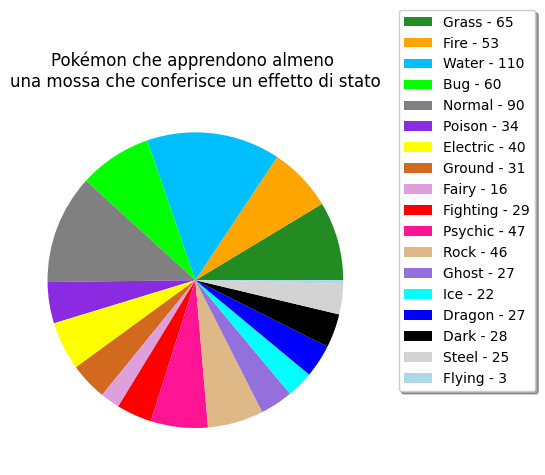

In [ ]:
#libreria per il grafico
import matplotlib.pyplot as plt
import numpy as np

#crea un dizionario con all'interno ogni tipo pokémon (che sono 18 in totale) e uno riservato a quelli che imparano almeno una mossa di stato
tipi_che_imparano = {}
tipi_totali = {}
legenda = []

for mon in dex:
  if mon['Type 1'] not in tipi_che_imparano:
    tipi_che_imparano[mon['Type 1']] = 0
    tipi_totali[mon['Type 1']] = 0
  if len(tipi_che_imparano) == 18:
    break

#conta i pokemon che soddisfano la condizione
for mon in dex:
  ha_contato = False
  for nome_mossa in mon['Moves']:
    if(mon['Moves'][nome_mossa]['Effect %'] != "--" and not ha_contato):
      tipi_che_imparano[mon['Type 1']] += 1
      ha_contato = True

#conta i pokemon totali
for mon in dex:
  if mon['Type 1'] not in tipi_totali:
    tipi_totali[mon['Type 1']] = 0
  else:
    tipi_totali[mon['Type 1']] += 1

#assegna i colori per ogni tipo al fine di facilitare
colori = ('forestgreen','orange','deepskyblue','lime','gray','blueviolet','yellow','chocolate','plum','red','deeppink','burlywood','mediumpurple','aqua','blue','black','lightgray','lightblue')

#formatta e assegna la legenda
for el_legenda in tipi_che_imparano.keys():
  legenda.append(el_legenda +  " - "+ str(tipi_che_imparano[el_legenda]))

fig_che_imparano, ax_che_imparano = plt.subplots()

ax_che_imparano.pie(tipi_che_imparano.values(),colors = colori, radius=1)
ax_che_imparano.legend(labels = legenda, loc=(1.05,0.2), shadow=True)
ax_che_imparano.set_title("Pokémon che apprendono almeno \nuna mossa che conferisce un effetto di stato")

fig_che_imparano.show()


Dato il nome di un Pokémon, restituisce il suo tipo

In [ ]:
#funzione di ricerca
def restituisci_pos(nome,dex):
  for i in range(len(dex)):
    if nome == dex[i]['Name']:
      return i
  return -1

#input
nome = input("Inserisci nome: ")
pos = restituisci_pos(nome,dex)

#ricerca
if(pos > 0):
  mon = dex[pos]
  desc_tipo = "Pokémon di tipo " + mon['Type 1']
  if mon['Type 2'] != "None":
    desc_tipo = desc_tipo + " e " + mon['Type 2']

#output
  print(f"Trovato {mon['Name']}, {desc_tipo}")
else:
  print(f"Non ho trovato pokémon di nome {nome}")

L'utente inserisce il nome di una mossa e il sistema restituisce il l'elenco di tutti i Pokémon che imparano la suddetta mossa

In [ ]:
#input
nome_mossa = input("Inserisci il nome (inglese) di una mossa: ")

output = {}

#ricerca
for mon in dex:
  for mossa in mon['Moves'].keys():
    if mossa == nome_mossa:
      livello = mon['Moves'][mossa]['Level']
      output[mon['Name']] = (mon['Name'])
      if livello == "—":
        output[mon['Name']] += " (Base) "
      else:
        output[mon['Name']] += " (Al livello " + mon['Moves'][mossa]['Level'] + ')'

#inizializza output
str_output = ""
c = list(output.keys())

#elabora l'output
for pos,nomi in enumerate(c):
  str_output += nomi
  if(pos < len(c) - 1):
    if(c[pos + 1].startswith('E') and pos == len(c)- 2):
      str_output+= " ed "
    elif(pos == len(c)- 2):
      str_output+= " e "
    else:
      str_output += ", "

#stampa output
if len(c) == 0:
  print(f"Nessun Pokémon impara la mossa \'{nome_mossa}\'.")
else:
  print(f"I Pokémon che imparano {nome_mossa} tramite level-up sono {len(output)}.\nEssi sono: \n{str_output}.")

Inserisci il nome (inglese) di una mossa: Thunderbolt
I Pokémon che imparano Thunderbolt tramite level-up sono 11.
Essi sono: 
Pikachu, Raichu, Electabuzz, Elekid, Electivire, Eelektrik, Stunfisk, Zekrom, Helioptile, Vikavolt e Xurkitree.


Dopo che l'utente sceglie una statistica, restituisce un grafico dove è possibile visualizzare la media della suddetta statistica per ogni tipo di pokémon

In [ ]:
import matplotlib.pyplot as mlp

#funzioni ausiliarie
def stampa_opzioni():
  print(f"""
  Opzioni disponibili:
  0: "HP",
  1: "Attack",
  2: "Defense",
  3: "Sp. Attack",
  4: "Sp. Defense",
  5: "Speed",
  6: "Total
  _____________________________"""
  )


def scegli_stat(num):
  switcher = {
      0: "HP",
      1: "Attack",
      2: "Defense",
      3: "Sp. Attack",
      4: "Sp. Defense",
      5: "Speed",
      6: "Total"
  }
  return switcher.get(num)

#input utente
stat = -1
while stat < 0 or stat > 6:
  stampa_opzioni()
  stat = input("Inserisci la statistica da cercare: ")
  stat = int(stat)

obiettivo = scegli_stat(stat)
print(f"Stai scegliendo la statistica {obiettivo} \n")

#inizializzazione dell'output
media_stat = {}
for keys in tipi_totali.keys():
  media_stat[keys] = 0

#calcolo output
for mon in dex:
  media_stat[mon['Type 1']] += int(mon[obiettivo])

for keys in tipi_totali.keys():
  media_stat[keys] /= tipi_totali[keys]


#output
fig, ax = plt.subplots()
ax.barh(list((media_stat.keys())), list(media_stat.values()), label=media_stat.keys(), color=colori)

plt.show()

L'utente inserisce il nome di un pokémon e di questo vengono restituite la mossa più potente e quella meno potente

In [ ]:
#funzioni ausiliarie

def restituisci_pos(nome,dex):
  for i in range(len(dex)):
    if nome == dex[i]['Name']:
      return i
  return -1

def get_potenza_max(mosse):
  potenza_max = -1
  for mossa in mosse:
    if mosse[mossa]['Power'] != "--" and mosse[mossa]['Power'] != "??":
      power = int(mosse[mossa]['Power'])
      if power > potenza_max:
        potenza_max = power
  return potenza_max

def get_potenza_min(mosse):
  potenza_min = 200
  for mossa in mosse:
    if mosse[mossa]['Power'] != "--" and mosse[mossa]['Power'] != "??":
      power = int(mosse[mossa]['Power'])
      if power < potenza_min:
        potenza_min = power
  return potenza_min


#input utente
nome = input("Inserisci nome: ")
pos = restituisci_pos(nome,dex)

#cerca del pokémon
if(pos > 0):
  mon = dex[pos]
  mosse = mon['Moves']
  max_pow = get_potenza_max(mosse)
  min_pow = get_potenza_min(mosse)

#cerca le mosse
  for mossa in mosse:
    if mosse[mossa]['Power'] == str(max_pow):
      max_mossa = mossa
    elif mosse[mossa]['Power'] == str(min_pow):
      min_mossa = mossa

#output
  print(f"La mossa più potente di {nome} è {max_mossa} con potenza {max_pow}, mentre la più debole è {min_mossa}, con potenza {min_pow}")

else:
  print(f"Non ho trovato nessun Pokémon di nome {nome}")

Dato un minimo di altezza e di peso, mostra in un grafico la quantità di pokémon che rispettano questi requisiti, suddivisi per tipo

Inserisci l'altezza in metri: 0.1
Inserisci il peso in kg: 1


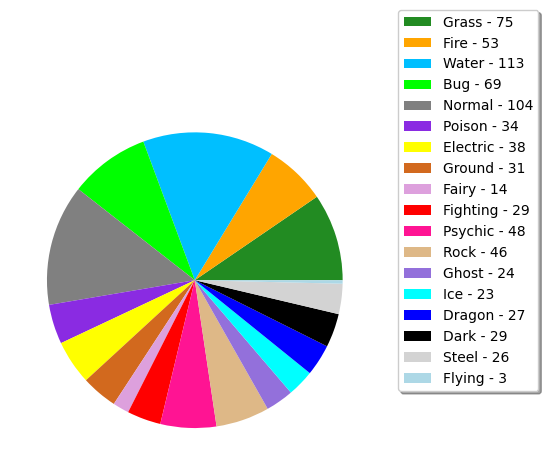

In [ ]:
import matplotlib.pyplot as plt

#input utente
altezza = input("Inserisci l'altezza in metri: ")
peso = input("Inserisci il peso in kg: ")

#inizializzazione di tutti i tipi
tipi_altezza_peso = {}

for mon in dex:
  if mon['Type 1'] not in tipi_altezza_peso:
    tipi_altezza_peso[mon['Type 1']] = 0
  if len(tipi_altezza_peso) == 18:
    break

#conta i pokémon che hanno le suddette caratteristiche
for mon in dex:
  if mon['Height (m)'] >= altezza and mon['Weight (kg)'] >= peso:
    tipi_altezza_peso[mon['Type 1']] += 1

#grafico
fig, ax = plt.subplots()
colori = ('forestgreen','orange','deepskyblue','lime','gray','blueviolet','yellow','chocolate','plum','red','deeppink','burlywood','mediumpurple','aqua','blue','black','lightgray','lightblue')

#legenda
legenda = []
for el_legenda in tipi_altezza_peso.keys():
  legenda.append(el_legenda +  " - "+ str(tipi_altezza_peso[el_legenda]))

ax.pie(tipi_altezza_peso.values(),colors = colori, radius=1)
ax.legend(labels = legenda, loc=(1.05,0.2), shadow=True)

fig.show()

Fa inserire all'utente un numero di tipi.
Stampa tutti i Pokémon che imparano almeno quel numero di tipi di mosse diverse.
Esempio: Se io scelgo "4", stamperà tutti i pokemon che apprendono quattro tipi di mosse diversi (ex. Fire, Normal, Steel, Fighting)

In [ ]:
#inizializza tutti i tipi presenti
tipi_totali = []

for mon in dex:
  if mon['Type 1'] not in tipi_totali:
    tipi_totali.append(mon['Type 1'])
  if len(tipi_totali) == 18:
    break

#input utente del numero mosse
target_moves = input("inserisci il numero target di mosse: ")
target_moves = int(target_moves)

#elaborazione dati
mon_che_imparano = []
for mon in dex:
  tipi_imparati = []
  for nome_mossa in mon['Moves']:
    mossa = mon['Moves'][nome_mossa]
    if mossa['Type'] not in tipi_imparati:
      tipi_imparati.append(mossa['Type'])
  if len(tipi_imparati) >= target_moves:
    mon_che_imparano.append(mon['Name'])

#output
if(len(mon_che_imparano) > 0):
  print(mon_che_imparano)
else:
  print("Nessun Pokémon apprende così tante mosse")

Dato il nome di una mossa, elenca tutti i Pokémon che apprendono almeno un certo numero (stabilito dall'utente) di mosse STAB di quel tipo (STAB = STESSO TIPO)

In [ ]:
#input
tipo_STAB = input("Inserisci il tipo: ")
target = input("Qual è il minimo di mosse STAB che vuoi prendere in considerazione? ")

print("\n")

#ricerca dei pokémon che rispettano questi requisiti
for mon in dex:
  conta_stab = 0
  if ((mon['Type 1'] == tipo_STAB) or (mon['Type 2'] == tipo_STAB)):
    for chiave_mossa in mon['Moves']:

      #conta le mosse STAB
      mossa = mon['Moves'][chiave_mossa]
      if mossa['Type'] == tipo_STAB:
        conta_stab += 1

#output
  if conta_stab >= int(target):
    print(f"{mon['Name']} Ha almeno {target} mosse STAB (Per essere precisi, sono {conta_stab})")

Scrive il Pokémon con la somma di statistiche base più alta per ogni tipo

In [ ]:
#inizializza tutti i tipi presenti
tipi_totali = []

for mon in dex:
  if mon['Type 1'] not in tipi:
    tipi_totali.append(mon['Type 1'])

#inizializza il dizionario di output
tipi_bst = {}

for chiave in tipi_totali:
  tipi_bst[chiave] = {
      "somma" : "0",
      "nome" : ""
  }

#confronta le statistiche
for mon in dex:
  if mon['Total'] > tipi_bst[mon['Type 1']]['somma']:
    tipi_bst[mon['Type 1']]['somma'] = mon['Total']
    tipi_bst[mon['Type 1']]['nome'] = mon['Name']

#output
for key in tipi_bst.keys():
  print(f"Il Pokémon con somma delle statistiche base più alta per il tipo {key} è {tipi_bst[key]['nome']}, con somma pari a {tipi_bst[key]['somma']}")

Il Pokémon con somma delle statistiche base più alta per il tipo Grass è Shaymin, con somma pari a 600
Il Pokémon con somma delle statistiche base più alta per il tipo Fire è Ho-Oh, con somma pari a 680
Il Pokémon con somma delle statistiche base più alta per il tipo Water è Palkia, con somma pari a 680
Il Pokémon con somma delle statistiche base più alta per il tipo Bug è Genesect, con somma pari a 600
Il Pokémon con somma delle statistiche base più alta per il tipo Normal è Arceus, con somma pari a 720
Il Pokémon con somma delle statistiche base più alta per il tipo Poison è Naganadel, con somma pari a 540
Il Pokémon con somma delle statistiche base più alta per il tipo Electric è Zeraora, con somma pari a 600
Il Pokémon con somma delle statistiche base più alta per il tipo Ground è Groudon, con somma pari a 670
Il Pokémon con somma delle statistiche base più alta per il tipo Fairy è Xerneas, con somma pari a 680
Il Pokémon con somma delle statistiche base più alta per il tipo Fighti

Dati tre tipi di Pokémon, controlla quanti appartengono a quale gruppo di esperienza (Exp Group) e li confronta in un grafico

In [ ]:
#importa librerie
import matplotlib.pyplot as plt
import numpy as np

#funzione che ritorna una lista contenente tutti i Pokémon di un tipo
def get_mon_tipo(dex,tipo):
  ritorno = []
  for mon in dex:
    if mon['Type 1'] == tipo:
      ritorno.append(mon)
  return ritorno

#funzione che ritorna un dizionario con tutti i gruppi di esperienza come chiavi
def componi_dizionario (dex, tipo):

  #valore di ritorno
  exp = {
      'Slow' : 0,
      'Fast' : 0,
      'Other' : 0,
  }

  #ricerca e compone il valore di ritorno
  for mon in get_mon_tipo(dex,tipo):
    gruppo = mon['Exp Group']
    if gruppo == "Slow" or gruppo == "Fast":
      exp [gruppo] += 1
    else:
      exp['Other'] += 1
  return exp

#input utente
tipo_1 = input("Inserisci il primo tipo: ")
tipo_2 = input("Inserisci il secondo tipo: ")
tipo_3 = input("Inserisci il terzo tipo: ")

#elaborazione valori per il grafico
tipi = (tipo_1,tipo_2, tipo_3)

exp_1 = componi_dizionario(dex,tipo_1)
exp_2 = componi_dizionario(dex,tipo_2)
exp_3 = componi_dizionario(dex,tipo_3)

valori = {
    tipo_1 : (exp_1['Slow'], exp_2['Slow'], exp_3['Slow']),
    tipo_2 : (exp_1['Fast'], exp_2['Fast'], exp_3['Fast']),
    tipo_3 : (exp_1['Other'], exp_2['Other'], exp_3['Other'])
}

#grafico
x = np.arange(len(valori))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in valori.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Pokémon divisi in base al gruppo di esperienza')
ax.set_xticks(x + width, tipi)
ax.legend(tuple(exp_1.keys()),loc='upper left', ncols=3)

plt.show()